In [1]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
from numpy.random import *
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression


In [19]:
# csv取り込み
df = pd.read_csv("./tallWeight.csv", skiprows=1, names=('tall', 'weight'))
print(df)

     tall  weight
0    78.8    10.4
1    89.1    12.8
2    95.3    14.2
3   103.2    16.5
4   109.5    18.5
5   115.9    20.4
6   121.1    23.4
7   127.3    26.2
8   133.1    29.8
9   137.5    32.9
10  145.0    37.1
11  149.9    42.2
12  158.8    45.8
13  164.1    51.9
14  169.2    57.2


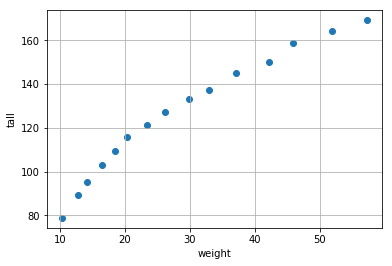

In [20]:
#身長と体重のグラフ
plt.scatter(df.weight, df.tall)
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


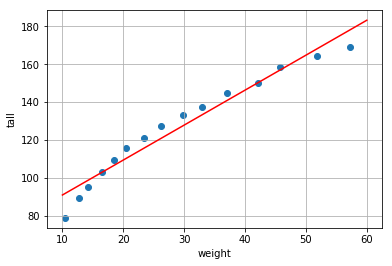

In [22]:
#Xを作成
dfWeight = df.weight
X = np.ones((dfWeight.size, 2))
for i in range(dfWeight.size):
    X[i, 1] = dfWeight[i]

#tを作成
t = df.tall

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)

#直線の式
linex = np.linspace(10, 60, 10000)
f = lambda x:w[0] + w[1]*x
liney = f(linex)

#図示
plt.scatter(df.weight, df.tall)
plt.plot(linex, liney, c='red')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)

In [8]:
#16人目が40.7kgのとき、身長は？
print(f(40.7))

147.60120273695122


In [15]:
#Xを作成
dfWeight = df.weight
m = 3
X = np.ones((dfWeight.size, m + 1))

for i in range(dfWeight.size):
    for j in range(m):
        X[i, j + 1] = dfWeight[i] ** (j + 1)

#tを作成
t = df.tall

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)

#直線の式
linex = np.linspace(10, 60, 10000)
print(linex)
f = lambda x:w[0] + w[1]*x + w[2]*(x ** 2) + w[3]*(x ** 3)
'''
f = lambda x:w[0]
for i in range(1):
    f = lambda x:f(x) + w[i+1]*(x**(i+1))
liney = f(linex)
'''
    

#図示
plt.scatter(df.weight, df.tall)
plt.plot(linex, liney, c='red')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)


AttributeError: 'DataFrame' object has no attribute 'weight'

In [6]:
#16人目が35.6kgのとき、身長は？
print(f(35.6))

143.20833796960784


In [10]:
# csv取り込み
df = pd.read_csv("./testSolve.csv", skiprows=1, names=('x', 'y'))
#ソート
df = df.sort_values('x')

print(df)

       x         y
79  0.00 -0.246319
80  0.01 -0.067350
44  0.02  0.602363
69  0.03 -0.127639
91  0.04  0.034174
40  0.05 -0.066260
14  0.06  0.450742
94  0.07  0.601147
11  0.08  0.344912
31  0.09  0.434617
66  0.10  0.518852
10  0.11  0.730681
29  0.12  0.476397
1   0.13  1.052615
55  0.14  0.154739
93  0.16  0.388053
24  0.17  0.813079
42  0.18  1.133907
43  0.19  1.167182
83  0.20  1.050628
78  0.21  1.022316
6   0.22  1.199697
61  0.23  1.016374
64  0.24  0.870271
81  0.25  1.020031
20  0.26  1.240373
23  0.27  0.529793
9   0.28  1.052765
57  0.29  0.551779
58  0.30  0.554227
..   ...       ...
39  0.70 -0.967759
25  0.71 -0.847882
70  0.72 -0.875564
75  0.73 -1.207658
54  0.74 -1.275103
74  0.75 -1.259232
48  0.76 -0.664957
2   0.77 -0.711156
63  0.78 -1.084734
60  0.79 -0.405891
84  0.80 -0.425099
22  0.81 -1.244766
13  0.82 -1.218677
62  0.83 -0.894066
95  0.84 -0.804615
37  0.85 -0.927536
87  0.86 -1.032614
76  0.87 -1.166063
92  0.88 -0.813458
98  0.89 -0.904650
36  0.90 -0.

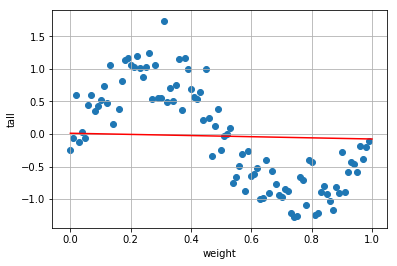

In [9]:
##線形回帰

#Xを作成
X = np.ones((df.x.size, 2))
for i in range(df.x.size):
    X[i, 1] = df.x[i]
#print(X)

#tを作成
t = df.y
#print(t)

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)
#print(w)

#直線の式
linex = np.linspace(0, 1, 1000)
f = lambda x: w[0] + w[1]*x
liney = f(linex)

#図示
plt.scatter(df.x, df.y)
plt.plot(linex, liney, c='red')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)

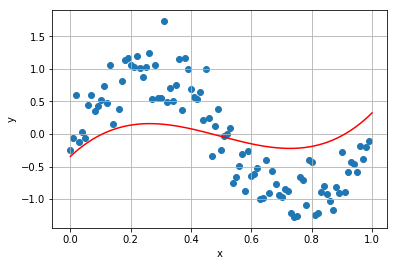

In [14]:
##多項式回帰
#Xを作成
#m = 3とする ただしm>1
m = 3
X = np.ones((df.x.size, m + 1))

for i in range(df.x.size):
    for j in range(m):
        X[i, j + 1] = df.x[i] ** (j + 1)
#print(X)


#tを作成
t = df.y
#print(t)

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)
#print(w)

#直線の式
linex = np.linspace(0, 1, 10000)
f = lambda x:w[0] + w[1]*x + w[2]*(x ** 2) + w[3]*(x ** 3)
                                                                                                                                                     
'''
f = lambda x:w[0]
for i in range(m):
    f = lambda x:f(x) + w[i+1]*(x**(i+1))
'''
liney = f(linex)


#図示
plt.scatter(df.x, df.y)
plt.plot(linex, liney, c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [17]:
linex = np.linspace(10, 60, 10)
print(linex)

[10.         15.55555556 21.11111111 26.66666667 32.22222222 37.77777778
 43.33333333 48.88888889 54.44444444 60.        ]
